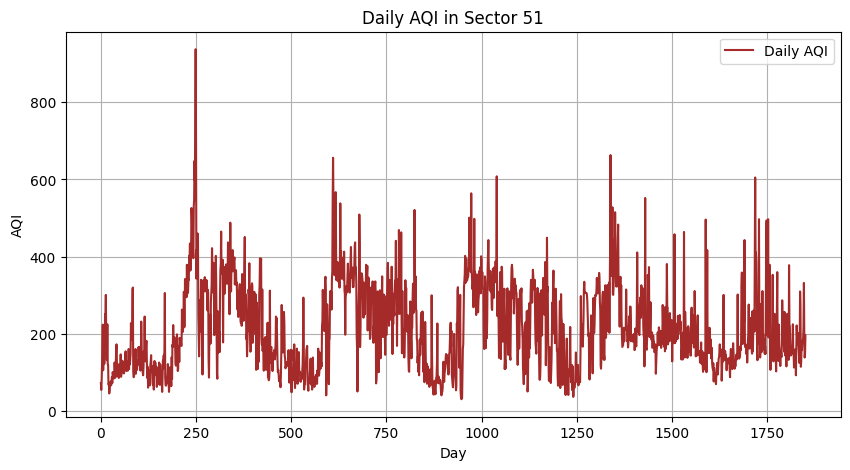

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Load data
df = pd.read_csv("/content/sector_51_daily_aqi.csv")

#drop the first column (unnessary)
df = df.drop(columns=['Unnamed: 0'])

ndf = df['AQI']

plt.figure(figsize=(10,5))
plt.plot(df['AQI'], label='Daily AQI',color='brown')
plt.title("Daily AQI in Sector 51")
plt.xlabel("Day")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#to fill NA/missing values with mean of AQI
mean_AQI = ndf.mean()
df1 = df.fillna(mean_AQI)
df1['AQI'].isnull().sum()
ndf = df1['AQI']
print("Missing values:",ndf.isna().sum())

Missing values: 0


In [ ]:
#adf test to check for stationarity
from statsmodels.tsa.stattools import adfuller
adf_result=adfuller(ndf)
print("ADF value: ",adf_result[0])
print("p-value: ",adf_result[1])
print("Critical values: ")
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')


ADF value:  -4.053237150883372
p-value:  0.0011560182425749085
Critical values: 
   1%: -3.433934297502219
   5%: -2.8631232673540117
   10%: -2.5676128776645637


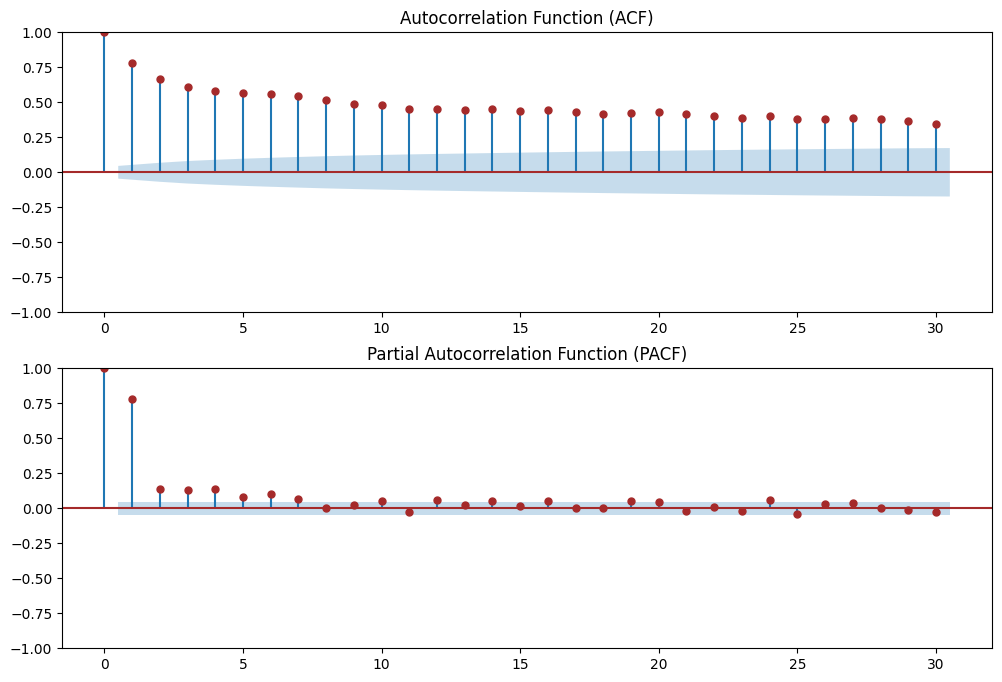

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
fig,ax=plt.subplots(2,1,figsize=(12,8))

# ACF plot
plot_acf(ndf, ax=ax[0], lags=30,color='brown')
ax[0].set_title("Autocorrelation Function (ACF)")

# PACF plot
plot_pacf(ndf, ax=ax[1], lags=30, method='ywm',color='brown')
ax[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA(1,0,1) using MLE

arima_model = ARIMA(df['AQI'], order=(1, 0, 1))
arima_result = arima_model.fit()
print("\nARIMA(1,0,1) MLE Parameters:")
print(arima_result.params)

# SARIMA(1,0,1)(1,0,1,12) using MLE
sarima_model = SARIMAX(df['AQI'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarima_result = sarima_model.fit()
print("\nSARIMA(1,0,1)(1,0,1,12) MLE Parameters:")
print(sarima_result.params)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



ARIMA(1,0,1) MLE Parameters:
const      214.584028
ar.L1        0.887708
ma.L1       -0.293396
sigma2    4478.405808
dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



SARIMA(1,0,1)(1,0,1,12) MLE Parameters:
ar.L1          0.909054
ma.L1         -0.327452
ar.S.L12       0.999533
ma.S.L12      -0.987300
sigma2      4513.298188
dtype: float64


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

train = ndf[:-20]
test = ndf[-20:]


mod1 = ARIMA(train, order = (1,0,1))
mod1_fit = mod1.fit()
mod1_fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AQI   No. Observations:                 1832
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10301.343
Date:                Sun, 20 Apr 2025   AIC                          20610.685
Time:                        04:08:59   BIC                          20632.738
Sample:                             0   HQIC                         20618.819
                               - 1832                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        214.8626     11.413     18.826      0.000     192.493     237.232
ar.L1          0.8893      0.011     79.766      0.000       0.867       0.911
ma.L1         -0.2958      0.021    -14.252      0.000      -0.336      -0.255
sigma2      4480.6476     97.948     45.745      0.000    4288.673    4672.623
===================================================================================
Ljung-Box (L1) (Q):                   3.30   Jarque-Bera (JB):               860.60
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

smod1 = SARIMAX(train,
                order=(1, 0, 1),
                seasonal_order=(1, 0, 1, 12))

smod1_fit = smod1.fit()
print(smod1_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                AQI   No. Observations:                 1832
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood              -10322.960
Date:                            Sun, 20 Apr 2025   AIC                          20655.920
Time:                                    04:10:16   BIC                          20683.486
Sample:                                         0   HQIC                         20666.087
                                           - 1832                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9119      0.010     90.777      0.000       0.892       0.932
ma.L1         -0.3207      0.020   

In [ ]:
forecast = mod1_fit.forecast(steps=20)
sforecast = smod1_fit.forecast(steps=20)



print('ARIMA\n',forecast)
print('SARIMA\n',sforecast)

ARIMA
 1832    184.082756
1833    187.490624
1834    190.521181
1835    193.216204
1836    195.612840
1837    197.744128
1838    199.639444
1839    201.324917
1840    202.823778
1841    204.156690
1842    205.342025
1843    206.396123
1844    207.333514
1845    208.167120
1846    208.908431
1847    209.567666
1848    210.153912
1849    210.675251
1850    211.138868
1851    211.551155
Name: predicted_mean, dtype: float64
SARIMA
 1832    194.957358
1833    190.388748
1834    187.400574
1835    187.847232
1836    190.430749
1837    192.957833
1838    180.989865
1839    193.580493
1840    192.059629
1841    195.151349
1842    184.005771
1843    189.214055
1844    203.715881
1845    198.366851
1846    194.666152
1847    194.460774
1848    196.448130
1849    198.431437
1850    185.977784
1851    198.108710
Name: predicted_mean, dtype: float64


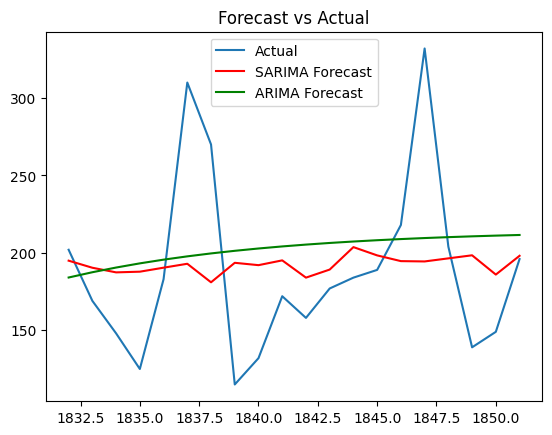

In [ ]:
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, sforecast, label='SARIMA Forecast', color='red')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='green')

plt.legend()
plt.title('Forecast vs Actual')
plt.show()

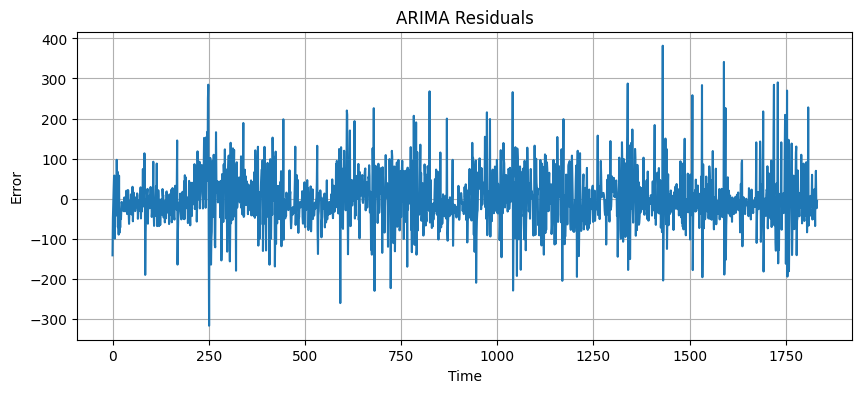

In [ ]:

residuals = mod1_fit.resid

# Plot residuals over time
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('ARIMA Residuals')
plt.xlabel('Time')
plt.ylabel('Error')
plt.grid(True)
plt.show()


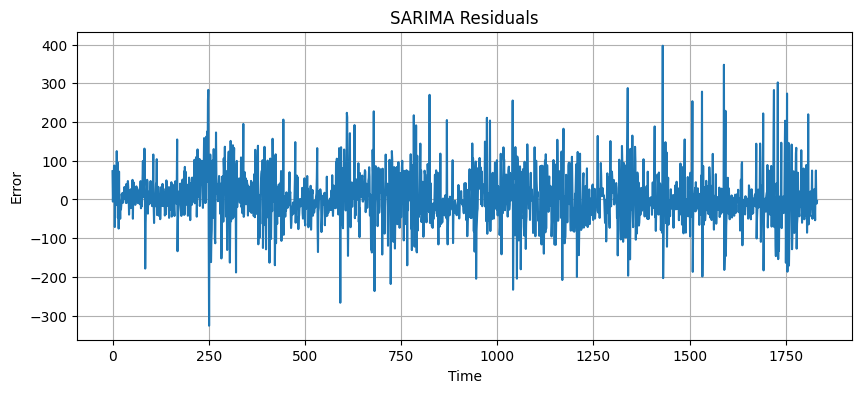

In [ ]:
sresiduals = smod1_fit.resid
plt.figure(figsize=(10, 4))
plt.plot(sresiduals)
plt.title('SARIMA Residuals')
plt.xlabel('Time')
plt.ylabel('Error')
plt.grid(True)
plt.show()

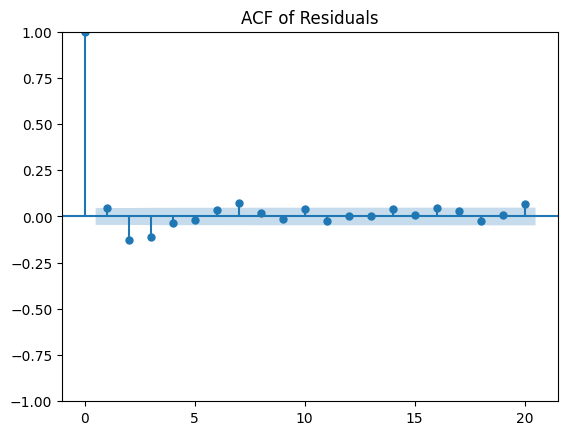

In [ ]:
plot_acf(sresiduals, lags=20)
plt.title('ACF of Residuals')
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
s_mse = mean_squared_error(test, sforecast)
s_mape = mean_absolute_percentage_error(test, sforecast) * 100
mse = mean_squared_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast) * 100
print(f'MSE: {mse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'SARIMA MSE: {s_mse:.2f}')
print(f'SARIMA MAPE: {s_mape:.2f}%')

MSE: 3335.27
MAPE: 26.72%
SARIMA MSE: 3186.43
SARIMA MAPE: 22.93%


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
s_ljung_box = acorr_ljungbox(sresiduals, lags=[10], return_df=True)
print(f'ARIMA ljung box:\n {ljung_box}\n')

print(f'SARIMA ljung box:\n {s_ljung_box}')


ARIMA ljung box:
       lb_stat     lb_pvalue
10  66.789122  1.840599e-10

SARIMA ljung box:
      lb_stat     lb_pvalue
10  75.50562  3.792776e-12


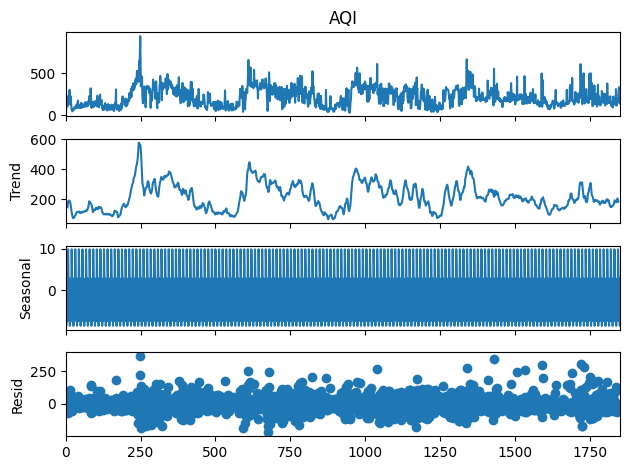

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ndf,model='additive',period=12)
decomposition.plot()
plt.show()

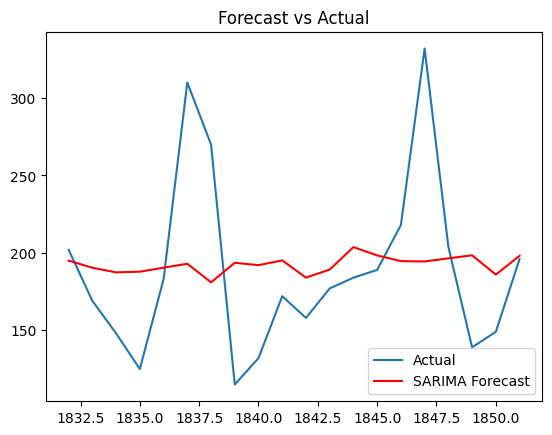

In [ ]:
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, sforecast, label='SARIMA Forecast', color='red')

plt.legend()
plt.title('Forecast vs Actual')
plt.show()